## Artificial Neural Networks introduction

In [1]:
import tensorflow as tf 
from tensorflow import keras

In [2]:
tf.__version__

'2.4.0'

In [3]:
keras.__version__


'2.4.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data() 

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0 
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:] 

In [8]:
class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_name[y_train[0]]

'Coat'

Creating the model

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(units=300, activation='relu'))
model.add(keras.layers.Dense(units=100, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [13]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 1.0172 - accuracy: 0.6741 - val_loss: 0.5096 - val_accuracy: 0.8318
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5066 - accuracy: 0.8254 - val_loss: 0.4456 - val_accuracy: 0.8454
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4524 - accuracy: 0.8412 - val_loss: 0.4265 - val_accuracy: 0.8550
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4232 - accuracy: 0.8517 - val_loss: 0.4224 - val_accuracy: 0.8524
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4006 - accuracy: 0.8605 - val_loss: 0.3791 - val_accuracy: 0.8674
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3864 - accuracy: 0.8640 - val_loss: 0.3700 - val_accuracy: 0.8702
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3702 - accuracy: 0.8689 - val_loss: 0.3699 - val_accuracy:

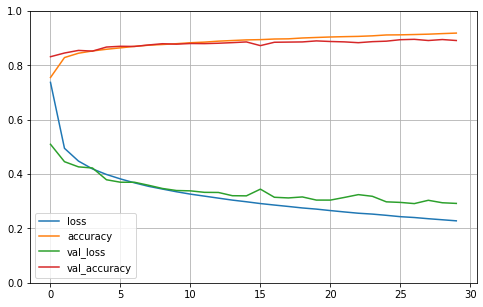

In [14]:
import pandas as pd 
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [15]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 62.2947 - accuracy: 0.8461


[62.29466247558594, 0.8460999727249146]

In [16]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [17]:
y_pred = model.predict_classes(X_new)
y_pred

/home/diego/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1])

In [18]:
import numpy as np
np.array(class_name)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [19]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

## Regression

In [20]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [21]:
model = keras.models.Sequential([
    keras.layers.Dense(units = 30, activation=keras.activations.relu, input_shape = X_train.shape[1:]),
    keras.layers.Dense(units=1)
])
model.compile(loss='mean_squared_error',
              optimizer='sgd')
model.fit(X_train,y_train, epochs=20,
          validation_data = (X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.3575 - val_loss: 0.6102
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5707 - val_loss: 0.4275
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4561 - val_loss: 0.4127
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4254 - val_loss: 0.3824
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4034 - val_loss: 0.3854
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3898 - val_loss: 0.3882
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4740 - val_loss: 0.4269
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4570 - val_loss: 0.4006
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3925 - val_loss: 0.4273
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4192 - val_loss: 0.3860

In [22]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 819us/step - loss: 0.3618


In [23]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

array([[1.949522 ],
       [2.7837868],
       [1.2496464]], dtype=float32)

wide & deep neural network


In [24]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [25]:
model.compile(loss='mse', optimizer = keras.optimizers.SGD(lr=1e-3))

In [26]:
model.fit(X_train,y_train, epochs=20,
          validation_data = (X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 3.1491 - val_loss: 0.7033
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7333 - val_loss: 0.6338
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6592 - val_loss: 0.6002
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6290 - val_loss: 0.5747
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5997 - val_loss: 0.5546
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5791 - val_loss: 0.5365
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5560 - val_loss: 0.5215
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5363 - val_loss: 0.5090
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5340 - val_loss: 0.4967
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5051 - val_loss: 0.4904

In [27]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4447


In [28]:
y_pred = model.predict(X_new)
y_pred

array([[2.1613197],
       [2.9042804],
       [1.2656889]], dtype=float32)

Two inputs model

In [29]:
input_a = keras.layers.Input(shape=[5], name="wide_input")
input_b = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(units=30, activation="relu")(input_b)
hidden2 = keras.layers.Dense(units=30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_a,hidden2])
output = keras.layers.Dense(units=1,name="output")(concat)
model = keras.Model(inputs=[input_a,input_b], outputs=[output])

In [30]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

In [31]:
X_train_a, X_train_b = X_train[:,:5], X_train[:,2:]
X_valid_a, X_valid_b = X_valid[:,:5], X_valid[:,2:]
X_test_a, X_test_b = X_test[:,:5], X_test[:,2:]
X_new_a, X_new_b = X_test_a[:3], X_test_b[:3]

In [32]:
history = model.fit((X_train_a,X_train_b), y_train, epochs=20,
                    validation_data=((X_valid_a,X_valid_b),y_valid))


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 3.3811 - val_loss: 0.9457
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9250 - val_loss: 0.6942
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6920 - val_loss: 0.6224
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6400 - val_loss: 0.5893
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6110 - val_loss: 0.5696
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5788 - val_loss: 0.5531
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5715 - val_loss: 0.5350
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5378 - val_loss: 0.5244
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5230 - val_loss: 0.5173
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5145 - val_loss: 0.5083

In [33]:
mse_test = model.evaluate((X_test_a,X_test_b), y_test)

162/162 [==============================] - 0s 848us/step - loss: 0.4658


In [34]:
y_pred = model.predict((X_new_a,X_new_b))
y_pred

array([[2.1109316],
       [2.5735905],
       [1.3454845]], dtype=float32)

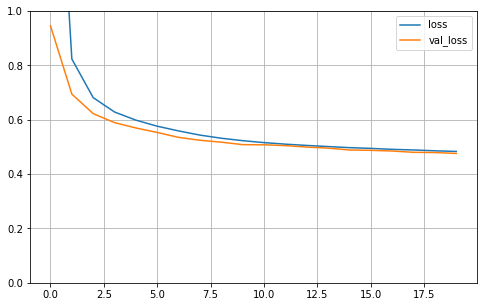

In [35]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Callback

In [38]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

In [39]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
                                                save_best_only=True)
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb], validation_data=(X_valid,y_valid))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.9505 - val_loss: 0.7498
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7455 - val_loss: 0.6246
Epoch 3/10
363/363 [==============================] - 1s 1ms/step - loss: 0.6622 - val_loss: 0.6004
Epoch 4/10
363/363 [==============================] - 1s 1ms/step - loss: 0.6317 - val_loss: 0.5766
Epoch 5/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5865 - val_loss: 0.5604
Epoch 6/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5792 - val_loss: 0.5473
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5571 - val_loss: 0.5355
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5590 - val_loss: 0.5316
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5112 - val_loss: 0.5187
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5214 - val_loss: 0.5149

In [40]:
model = keras.models.load_model("my_keras_model.h5")

In [41]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb, early_stopping_cb], validation_data=(X_valid,y_valid))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5193 - val_loss: 0.5096
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5121 - val_loss: 0.5041
Epoch 3/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5058 - val_loss: 0.4973
Epoch 4/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5004 - val_loss: 0.4971
Epoch 5/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4954 - val_loss: 0.5032
Epoch 6/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4909 - val_loss: 0.4827
Epoch 7/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4879 - val_loss: 0.4872
Epoch 8/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4837 - val_loss: 0.4810
Epoch 9/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4806 - val_loss: 0.4805
Epoch 10/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4776 - val_loss: 0.4783

In [42]:
model = keras.models.load_model("my_keras_model.h5")

In [43]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs['val_loss'] / logs['loss']))

In [44]:
print_train = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb, early_stopping_cb, print_train], validation_data=(X_valid,y_valid))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4745 - val_loss: 0.4706

val/train: 0.99
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4721 - val_loss: 0.4796

val/train: 1.02
Epoch 3/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4698 - val_loss: 0.4708

val/train: 1.00
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4672 - val_loss: 0.4872

val/train: 1.04
Epoch 5/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4646 - val_loss: 0.4652

val/train: 1.00
Epoch 6/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4628 - val_loss: 0.4695

val/train: 1.01
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4604 - val_loss: 0.4639

val/train: 1.01
Epoch 8/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4585 - val_loss: 0.4584

val/train: 1.00
Epoch 9/10
363/363 [==============================] - 0s 1ms/ste

## TensorBoard

In [45]:
import os


root_logdir = os.path.join(os.curdir, "my_logs")

In [49]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [50]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

In [51]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 2.7128 - val_loss: 0.9515
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.9487 - val_loss: 0.7945
Epoch 3/30
363/363 [==============================] - 1s 1ms/step - loss: 0.8025 - val_loss: 0.7165
Epoch 4/30
363/363 [==============================] - 1s 1ms/step - loss: 0.7225 - val_loss: 0.6659
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6775 - val_loss: 0.6273
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6373 - val_loss: 0.5969
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6051 - val_loss: 0.5755
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5968 - val_loss: 0.5570
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5570 - val_loss: 0.5398
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5440 - val_loss: 0.5290

In [52]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)

with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar('my_scalar', np.sin(step/10.0), step=step)
        data = (np.random.randn(100) + 2) * step / 100.0
        tf.summary.histogram('my_hist', data, buckets=50, step=step)
        images = np.random.rand(2,32,32,3)
        tf.summary.image('my_images', images * step / 1000, step=step)
        

## Wrapper

In [53]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(units=n_neurons, activation='relu'))
    model.add(keras.layers.Dense(units=1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

In [54]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [ ]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = 